In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [5]:
dbcon = pymysql.connect(host='localhost', user='root',password='192005Zeyad@',database='hr')

In [6]:
df= pd.read_sql('SELECT * FROM consolidated_search_ds', con=dbcon)

C:\Users\ysyzy\AppData\Local\Temp\ipykernel_28280\2507440821.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql('SELECT * FROM consolidated_search_ds', con=dbcon)


In [29]:
df.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

### TOAL NUMBER OF DATA SS JOBS IS 3211


In [13]:
def details(df):
    print('DataFrame Shape',df.shape,'\n')
    print('DataFrame Columns',df.columns,'\n')
    print('DataFrame Info')
    df.info()
    print('Checking for Missing Values','\n')
    print(df.isnull().sum())
    print('DataFrame Description','\n')
    print(df.describe())
    
def values_in_columns(df):
    for i in df.columns:
        print(f'column name:{i}')
        print(df[i].nunique(),'\n')
        print(df[i].value_counts(),'\n')

def duplicate_rows(df):
    if df.duplicated().sum()>0:
        print('Duplicate Rows:', df.duplicated().sum())
        df.drop_duplicates(inplace=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print('No Duplicate Rows Found')
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }



In [14]:
details(df)

DataFrame Shape (3211, 30) 

DataFrame Columns Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object') 

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   A

In [15]:
values_in_columns(df)

column name:Job Title
2789 

Job Title
Business Analyst                                                    46
System Analyst                                                      35
Analyst Programmer                                                  31
Data Analyst                                                        25
Data Scientist                                                      17
                                                                    ..
Enterprise Compute Specialist                                        1
Service Engineer (Fresh graduates are also welcome)                  1
Senior Security Consultant                                           1
Senior Analyst / Analyst (Application Development) (three posts)     1
Project Management Officer                                           1
Name: count, Length: 2789, dtype: int64 

column name:Company
1232 

Company
IT Solutions Limited.                                                                  43
Robert Walter

### Interpretations

 num of companies : 1232 
 ####
 num of industry : 51 
 ####
 Job Type : 41
####
 job of Entry  :  1328
 ####
 job of Middle  :  1000
 ####
 job of Senior   :  883
####
 total of jobs Data Scientist: 2490
 ####
 total of jobs Data Analyst: 502
 ####
 total of jobs Business Intellgence: 137
 ####
 total of jobs Data Engineer: 55
 ####
 total of jobs Machine Learning Engineer: 27
 ####



<Axes: ylabel='count'>

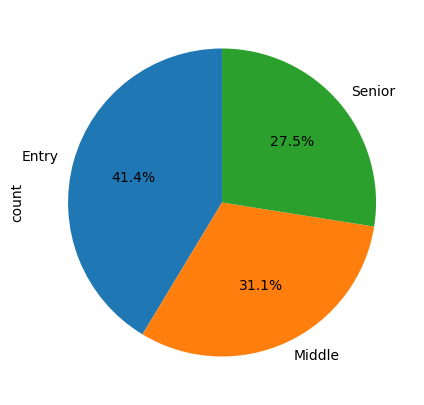

In [17]:
df['Career Level'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90)

<Axes: xlabel='Search Term'>

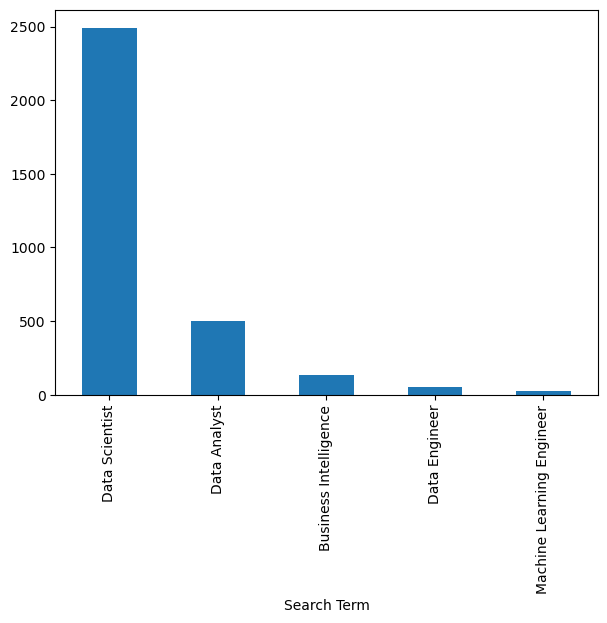

In [19]:
df['Search Term'].value_counts().plot(kind='bar', figsize=(7, 5))

<Axes: ylabel='Qualification'>

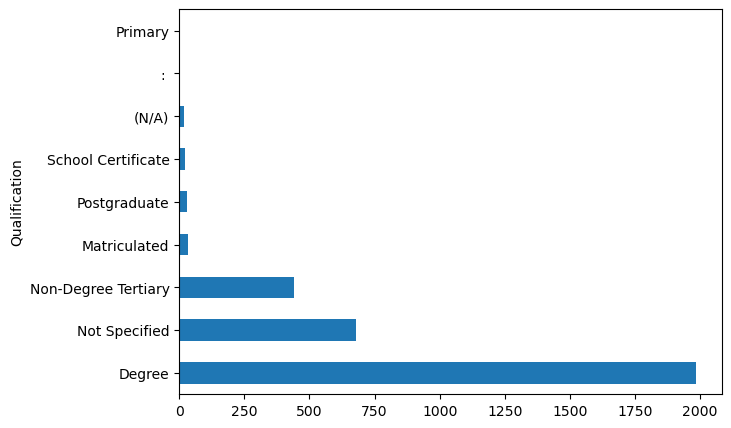

In [20]:
df['Qualification'].value_counts().plot(kind='barh', figsize=(7, 5))

<Axes: ylabel='count'>

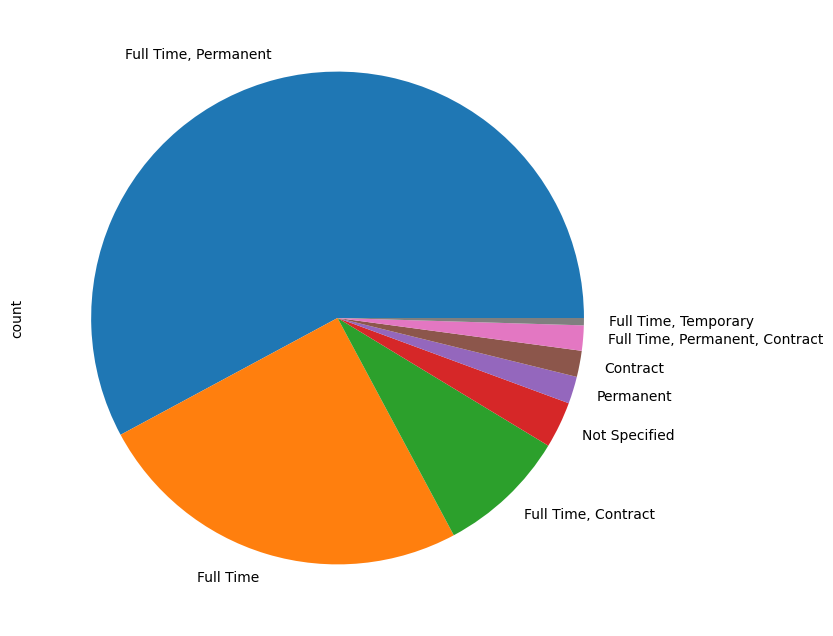

In [25]:
df['Job Type'].value_counts()[:8].plot(kind='pie', figsize=(8, 8))

<Axes: xlabel='Years of Experience'>

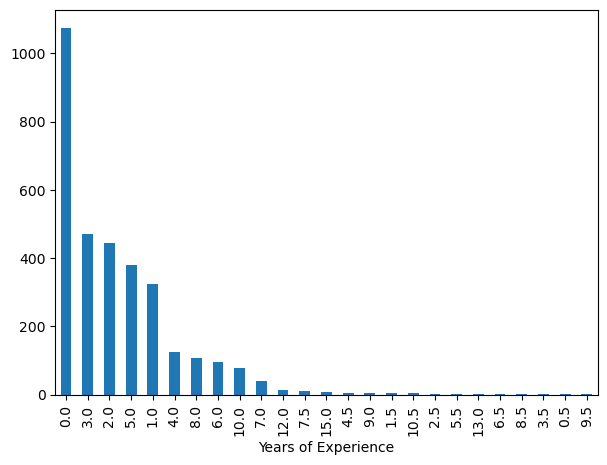

In [27]:
df['Years of Experience'].replace(-1,0).value_counts().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Industry'>

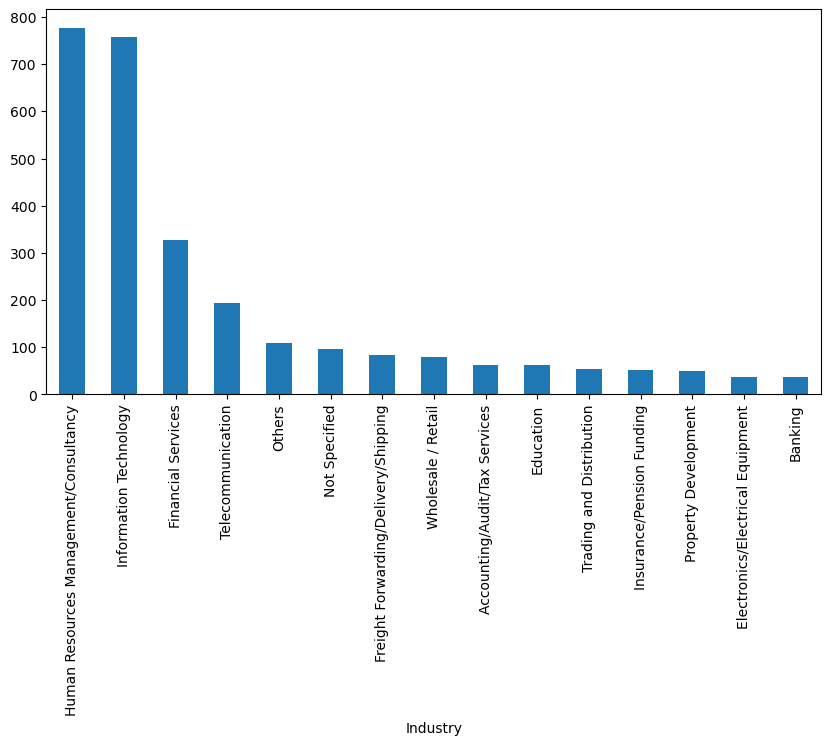

In [35]:
df['Industry'].value_counts()[:15].plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Salary'>

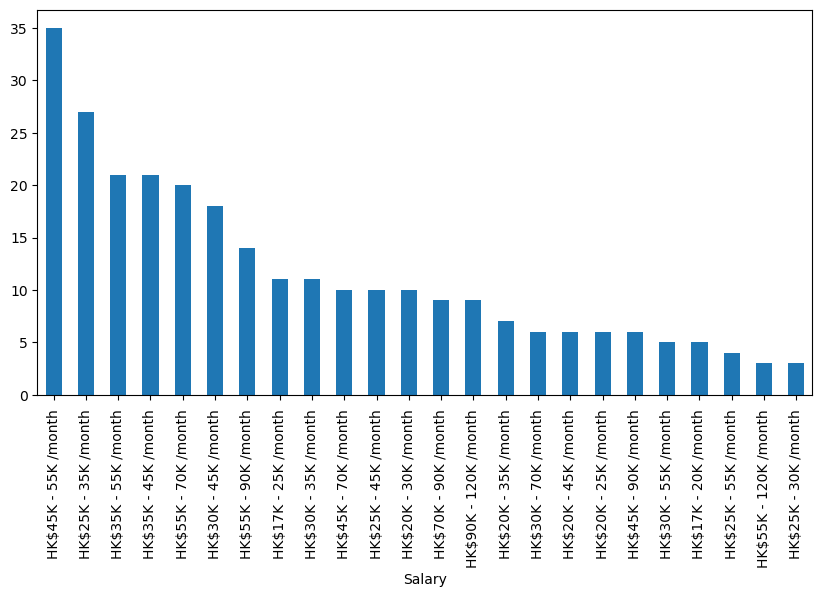

In [34]:
df['Salary'].value_counts()[1:25].plot(kind='bar', figsize=(10, 5))


<Axes: xlabel='Lower Salary Range'>

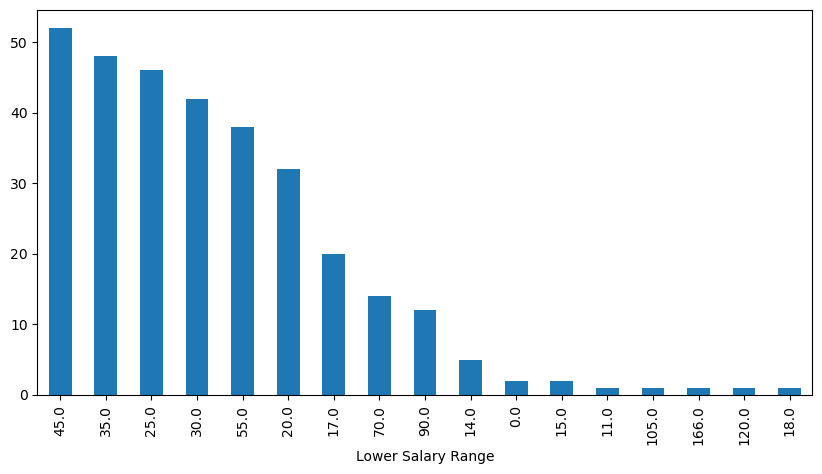

In [40]:
df['Lower Salary Range'].value_counts().plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Upper Salary Range'>

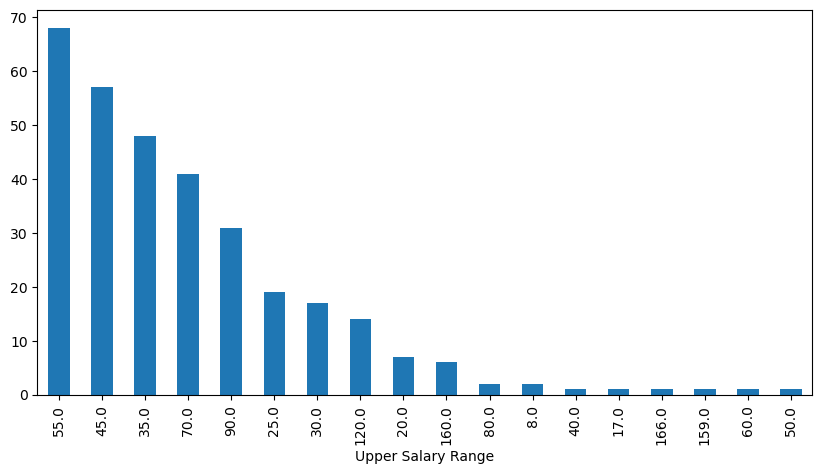

In [42]:

df['Upper Salary Range'].value_counts().plot(kind='bar', figsize=(10, 5))

In [43]:
df.to_csv('dc_jobs.csv')

<Axes: xlabel='Company'>

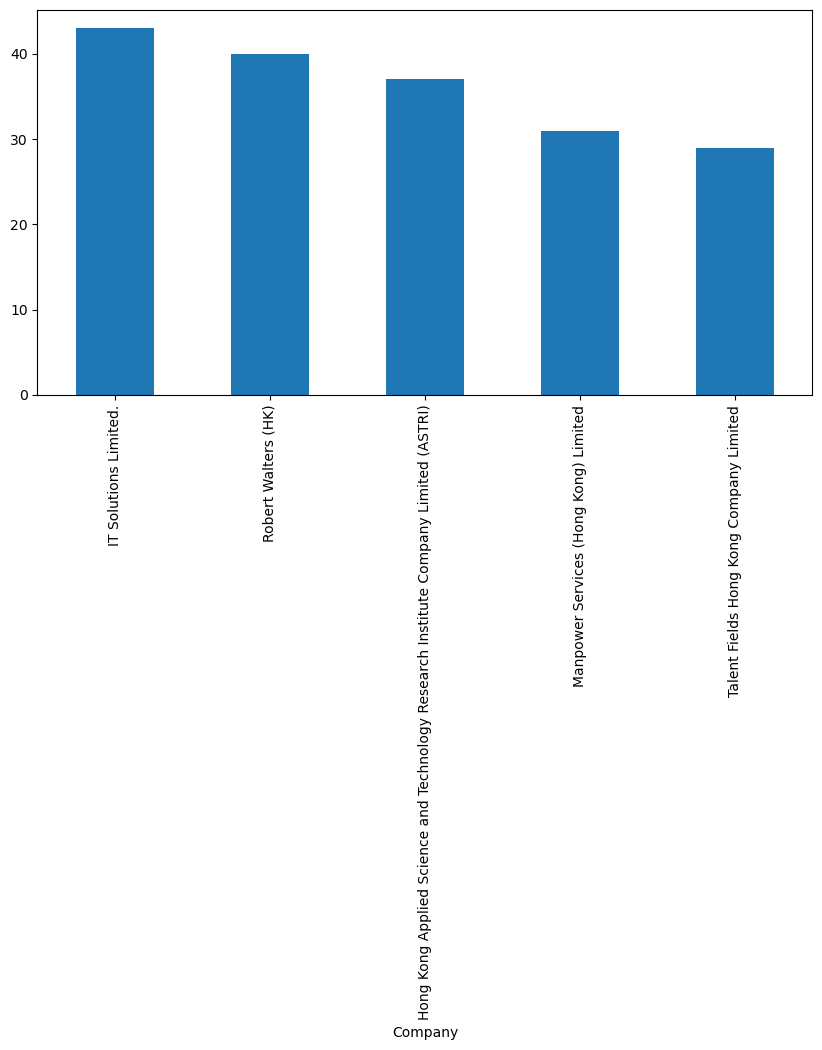

In [45]:
df['Company'].value_counts()[:5].plot(kind='bar', figsize=(10, 5))